<a href="https://colab.research.google.com/github/RJRuhan/notebook/blob/main/model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/Thesis/Datasets/colab Notebook
%ls

/content/drive/MyDrive/Thesis/Datasets/colab Notebook
best_model.01-0.62.h5  best_model.03-0.60.h5  best_model.06-0.53.h5  helpers.py
best_model.01-0.68.h5  best_model.03-0.62.h5  exp_cnn_filters1.png   modified_dataset/
best_model.01-0.86.h5  best_model.03-0.69.h5  exp_cnn_filters.png    plot.py
best_model.02-0.67.h5  best_model.05-0.56.h5  exp_cnn_kernel1.png    __pycache__/
best_model.02-0.69.h5  best_model.05-0.61.h5  exp_cnn_kernel.png


In [2]:
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from matplotlib import pyplot

import helpers
np.random.seed(1)

In [3]:
def load_dataset():
	# load all train
	trainX, trainy, testX, testy = helpers.get_all_train_walk_vector_imuz_right()
	print(trainX.shape, trainy.shape)
	# load all test
	print(testX.shape, testy.shape)
	# one hot encode y
	trainy = keras.utils.to_categorical(trainy)
	testy = keras.utils.to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy

trainX, trainy, testX, testy = load_dataset()


No IMUZ Right Walk Found
No IMUZ Right Walk Found
(315, 350, 6) (315,)
(134, 350, 6) (134,)
(315, 350, 6) (315, 2) (134, 350, 6) (134, 2)


In [4]:
def createModel(n_timesteps,n_features,n_outputs, kernel_size, filters):
  model_m = keras.models.Sequential()
  model_m.add(Conv1D(filters, kernel_size, activation='relu', input_shape=(n_timesteps, n_features)))
  model_m.add(Conv1D(filters, kernel_size, activation='relu'))
  model_m.add(MaxPooling1D(3))
  model_m.add(Conv1D(160, kernel_size, activation='relu'))
  model_m.add(Conv1D(160, kernel_size, activation='relu'))
  model_m.add(GlobalAveragePooling1D())
  model_m.add(Dropout(0.5))
  model_m.add(Dense(n_outputs, activation='softmax'))
  # print(model_m.summary())
  return model_m



In [5]:
# callbacks_list = [
#     keras.callbacks.ModelCheckpoint(
#         filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
#         monitor='val_loss', save_best_only=True),
#     keras.callbacks.EarlyStopping(monitor='accuracy', patience=1)
# ]
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, kernel_size, filters):
  verbose, epochs, batch_size = 0, 10, 32
  n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
  model_m = createModel(n_timesteps,n_features,n_outputs, kernel_size, filters)
  model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
  # fit network
  history = model_m.fit(trainX,
                      trainy,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_split=0.2,
                      verbose=verbose)
  # evaluate model
  _, accuracy = model_m.evaluate(testX, testy, batch_size=batch_size, verbose=0)
  return accuracy

In [6]:
def summarize_results(scores):
	print(scores)
	m, s = np.mean(scores), np.std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=10):
		# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(trainX, trainy, testX, testy, 3, 64)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)

run_experiment(10)

>#1: 58.955
>#2: 58.955
>#3: 61.194
>#4: 59.701
>#5: 64.925
>#6: 60.448
>#7: 52.239
>#8: 59.701
>#9: 61.940
>#10: 52.985
[58.955222368240356, 58.955222368240356, 61.194032430648804, 59.70149040222168, 64.92537260055542, 60.447758436203, 52.23880410194397, 59.70149040222168, 61.94030046463013, 52.98507213592529]
Accuracy: 59.104% (+/-3.653)


>p=8 #1: 58.955
>p=8 #2: 68.657
>p=8 #3: 71.642
>p=8 #4: 58.209
>p=8 #5: 63.433
>p=8 #6: 56.716
>p=8 #7: 61.940
>p=8 #8: 59.701
>p=8 #9: 61.940
>p=8 #10: 58.209
>p=16 #1: 66.418
>p=16 #2: 70.896
>p=16 #3: 68.657
>p=16 #4: 70.149
>p=16 #5: 65.672
>p=16 #6: 61.194
>p=16 #7: 68.657
>p=16 #8: 66.418
>p=16 #9: 65.672
>p=16 #10: 62.687
>p=32 #1: 66.418
>p=32 #2: 66.418
>p=32 #3: 69.403
>p=32 #4: 70.896
>p=32 #5: 70.896
>p=32 #6: 68.657
>p=32 #7: 64.179
>p=32 #8: 70.149
>p=32 #9: 67.910
>p=32 #10: 58.955
>p=64 #1: 64.925
>p=64 #2: 70.149
>p=64 #3: 70.149
>p=64 #4: 64.179
>p=64 #5: 64.179
>p=64 #6: 67.164
>p=64 #7: 66.418
>p=64 #8: 70.149
>p=64 #9: 57.463
>p=64 #10: 70.896
>p=128 #1: 67.910
>p=128 #2: 70.896
>p=128 #3: 61.940
>p=128 #4: 65.672
>p=128 #5: 59.701
>p=128 #6: 65.672
>p=128 #7: 64.925
>p=128 #8: 65.672
>p=128 #9: 70.149
>p=128 #10: 58.955
>p=256 #1: 64.179
>p=256 #2: 72.388
>p=256 #3: 64.179
>p=256 #4: 61.940
>p=256 #5: 61.194
>p=256 #6: 55.970
>p=256 #7: 70.896
>p=256 #8: 67.910
>

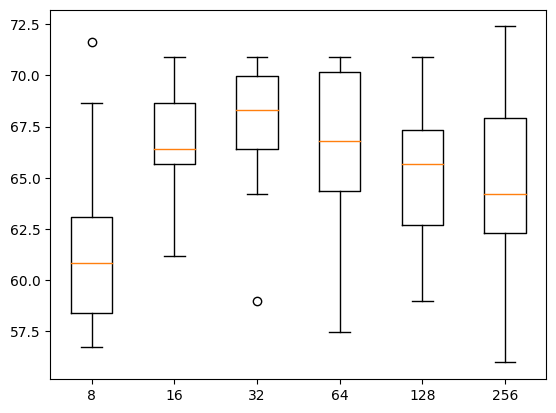

In [7]:
# summarize scores
def summarize_results(scores, params):
	print(scores, params)
	# summarize mean and standard deviation
	for i in range(len(scores)):
		m, s = np.mean(scores[i]), np.std(scores[i])
		print('Param=%d: %.3f%% (+/-%.3f)' % (params[i], m, s))
	# boxplot of scores
	pyplot.boxplot(scores, labels=params)
	pyplot.savefig('exp_cnn_filters.png')

# run an experiment
def run_experiment(params, repeats=10):
	# test each parameter
	all_scores = list()
	for p in params:
		# repeat experiment
		scores = list()
		for r in range(repeats):
			score = evaluate_model(trainX, trainy, testX, testy, 7, p)
			score = score * 100.0
			print('>p=%d #%d: %.3f' % (p, r+1, score))
			scores.append(score)
		all_scores.append(scores)
	# summarize results
	summarize_results(all_scores, params)

# run the experiment
n_params = [8, 16, 32, 64, 128, 256]
run_experiment(n_params)

[[67.16417670249939, 70.14925479888916, 60.447758436203, 68.65671873092651, 64.92537260055542, 58.20895433425903, 68.65671873092651, 70.14925479888916, 64.1791045665741, 63.43283653259277], [66.41790866851807, 67.16417670249939, 53.731346130371094, 70.14925479888916, 63.43283653259277, 59.70149040222168, 61.94030046463013, 64.1791045665741, 71.6417908668518, 70.14925479888916], [65.67164063453674, 67.91045069694519, 57.46268630027771, 64.92537260055542, 67.91045069694519, 67.91045069694519, 60.447758436203, 65.67164063453674, 70.89552283287048, 67.16417670249939], [61.94030046463013, 69.40298676490784, 66.41790866851807, 68.65671873092651, 65.67164063453674, 68.65671873092651, 66.41790866851807, 67.91045069694519, 66.41790866851807, 72.38805890083313], [58.955222368240356, 59.70149040222168, 65.67164063453674, 63.43283653259277, 57.46268630027771, 68.65671873092651, 66.41790866851807, 65.67164063453674, 62.68656849861145, 65.67164063453674], [58.20895433425903, 67.91045069694519, 67.16

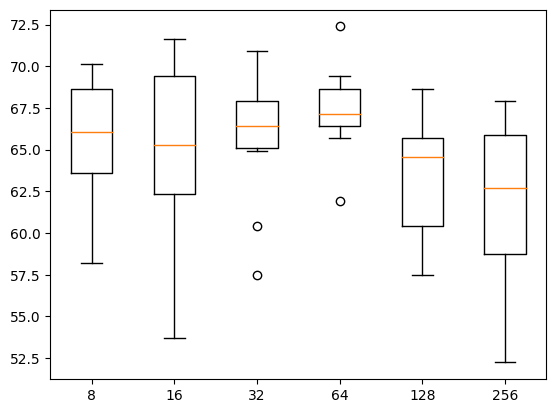

In [8]:
def summarize_results(scores, params):
	print(scores, params)
	# summarize mean and standard deviation
	for i in range(len(scores)):
		m, s = np.mean(scores[i]), np.std(scores[i])
		print('Param=%d: %.3f%% (+/-%.3f)' % (params[i], m, s))
	# boxplot of scores
	pyplot.boxplot(scores, labels=params)
	pyplot.savefig('exp_cnn_filters1.png')
all_scores = [[67.16417670249939, 70.14925479888916, 60.447758436203, 68.65671873092651, 64.92537260055542, 58.20895433425903, 68.65671873092651, 70.14925479888916, 64.1791045665741, 63.43283653259277], [66.41790866851807, 67.16417670249939, 53.731346130371094, 70.14925479888916, 63.43283653259277, 59.70149040222168, 61.94030046463013, 64.1791045665741, 71.6417908668518, 70.14925479888916], [65.67164063453674, 67.91045069694519, 57.46268630027771, 64.92537260055542, 67.91045069694519, 67.91045069694519, 60.447758436203, 65.67164063453674, 70.89552283287048, 67.16417670249939], [61.94030046463013, 69.40298676490784, 66.41790866851807, 68.65671873092651, 65.67164063453674, 68.65671873092651, 66.41790866851807, 67.91045069694519, 66.41790866851807, 72.38805890083313], [58.955222368240356, 59.70149040222168, 65.67164063453674, 63.43283653259277, 57.46268630027771, 68.65671873092651, 66.41790866851807, 65.67164063453674, 62.68656849861145, 65.67164063453674], [58.20895433425903, 67.91045069694519, 67.16417670249939, 58.20895433425903, 52.23880410194397, 66.41790866851807, 60.447758436203, 64.1791045665741, 61.194032430648804, 64.1791045665741]]
params = [8, 16, 32, 64, 128, 256]
summarize_results(all_scores, params)


>p=50 #1: 72.388
>p=50 #2: 75.373
>p=50 #3: 71.642
>p=50 #4: 74.627
>p=50 #5: 73.881
>p=50 #6: 73.134
>p=50 #7: 75.373
>p=50 #8: 74.627
>p=50 #9: 74.627
>p=50 #10: 73.134
[[72.38805890083313, 75.3731369972229, 71.6417908668518, 74.6268630027771, 73.88059496879578, 73.13432693481445, 75.3731369972229, 74.6268630027771, 74.6268630027771, 73.13432693481445]] [50]
Param=50: 73.881% (+/-1.203)


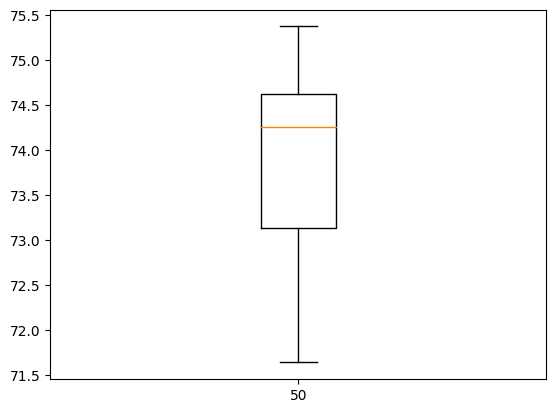

In [9]:
def createModel(n_timesteps,n_features,n_outputs, kernel_size, filters):
  model_m = keras.models.Sequential()
  model_m.add(Conv1D(filters, kernel_size, activation='relu', input_shape=(n_timesteps, n_features)))
  model_m.add(Conv1D(filters, kernel_size, activation='relu'))
  model_m.add(MaxPooling1D(3))
  model_m.add(Conv1D(160, kernel_size, activation='relu'))
  # model_m.add(Conv1D(160, kernel_size, activation='relu'))
  model_m.add(GlobalAveragePooling1D())
  model_m.add(Dropout(0.5))
  model_m.add(Dense(n_outputs, activation='softmax'))
  # print(model_m.summary())
  return model_m

# summarize scores
def summarize_results(scores, params):
	print(scores, params)
	# summarize mean and standard deviation
	for i in range(len(scores)):
		m, s = np.mean(scores[i]), np.std(scores[i])
		print('Param=%d: %.3f%% (+/-%.3f)' % (params[i], m, s))
	# boxplot of scores
	pyplot.boxplot(scores, labels=params)
	pyplot.savefig('exp_cnn_kernel1.png')

# run an experiment
def run_experiment(params, repeats=10):
	# test each parameter
	all_scores = list()
	for p in params:
		# repeat experiment
		scores = list()
		for r in range(repeats):
			score = evaluate_model(trainX, trainy, testX, testy, p, 64)
			score = score * 100.0
			print('>p=%d #%d: %.3f' % (p, r+1, score))
			scores.append(score)
		all_scores.append(scores)
	# summarize results
	summarize_results(all_scores, params)

# run the experiment
n_params = [50]
run_experiment(n_params)

In [10]:

# def feature_normalize(dataset):

#     mu = np.mean(dataset, axis=0)
#     sigma = np.std(dataset, axis=0)
#     return (dataset - mu)/sigma

# def show_confusion_matrix(validations, predictions):

#     matrix = metrics.confusion_matrix(validations, predictions)
#     plt.figure(figsize=(6, 4))
#     sns.heatmap(matrix,
#                 cmap="coolwarm",
#                 linecolor='white',
#                 linewidths=1,
#                 xticklabels=LABELS,
#                 yticklabels=LABELS,
#                 annot=True,
#                 fmt="d")
#     plt.title("Confusion Matrix")
#     plt.ylabel("True Label")
#     plt.xlabel("Predicted Label")
#     plt.show()


# def convert_to_float(x):

#     try:
#         return np.float(x)
#     except:
#         return np.nan


# def plot_axis(ax, x, y, title):

#     ax.plot(x, y)
#     ax.set_title(title)
#     ax.xaxis.set_visible(False)
#     ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
#     ax.set_xlim([min(x), max(x)])
#     ax.grid(True)


# def plot_activity(activity, data):

#     fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,
#          figsize=(15, 10),
#          sharex=True)
#     plot_axis(ax0, data['timestamp'], data['x-axis'], 'x-axis')
#     plot_axis(ax1, data['timestamp'], data['y-axis'], 'y-axis')
#     plot_axis(ax2, data['timestamp'], data['z-axis'], 'z-axis')
#     plt.subplots_adjust(hspace=0.2)
#     fig.suptitle(activity)
#     plt.subplots_adjust(top=0.90)
#     plt.show()


# def create_segments_and_labels(df, time_steps, step, label_name):

#     """
#     This function receives a dataframe and returns the reshaped segments
#     of x,y,z acceleration as well as the corresponding labels

#     Args:
#         df: Dataframe in the expected format
#         time_steps: Integer value of the length of a segment that is created
#     Returns:
#         reshaped_segments
#         labels:
#     """

#     # x, y, z acceleration as features
#     N_FEATURES = 3
#     # Number of steps to advance in each iteration (for me, it should always
#     # be equal to the time_steps in order to have no overlap between segments)
#     # step = time_steps
#     segments = []
#     labels = []
#     for i in range(0, len(df) - time_steps, step):
#         xs = df['x-axis'].values[i: i + time_steps]
#         ys = df['y-axis'].values[i: i + time_steps]
#         zs = df['z-axis'].values[i: i + time_steps]
#         # Retrieve the most often used label in this segment
#         label = stats.mode(df[label_name][i: i + time_steps])[0][0]
#         segments.append([xs, ys, zs])
#         labels.append(label)

#     # Bring the segments into a better shape
#     reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
#     labels = np.asarray(labels)

#     return reshaped_segments, labels

# # %%

# # ------- THE PROGRAM TO LOAD DATA AND TRAIN THE MODEL -------

# # Set some standard parameters upfront
# pd.options.display.float_format = '{:.1f}'.format
# sns.set() # Default seaborn look and feel
# plt.style.use('ggplot')
# print('keras version ', keras.__version__)

# LABELS = ["Downstairs",
#           "Jogging",
#           "Sitting",
#           "Standing",
#           "Upstairs",
#           "Walking"]
# # The number of steps within one time segment
# TIME_PERIODS = 80
# # The steps to take from one segment to the next; if this value is equal to
# # TIME_PERIODS, then there is no overlap between the segments
# STEP_DISTANCE = 40

# print("\n--- Learning curve of model training ---\n")

# # summarize history for accuracy and loss
# plt.figure(figsize=(6, 4))
# plt.plot(history.history['acc'], "g--", label="Accuracy of training data")
# plt.plot(history.history['val_acc'], "g", label="Accuracy of validation data")
# plt.plot(history.history['loss'], "r--", label="Loss of training data")
# plt.plot(history.history['val_loss'], "r", label="Loss of validation data")
# plt.title('Model Accuracy and Loss')
# plt.ylabel('Accuracy and Loss')
# plt.xlabel('Training Epoch')
# plt.ylim(0)
# plt.legend()
# plt.show()

# #%%

# print("\n--- Check against test data ---\n")

# # Normalize features for training data set
# df_test['x-axis'] = feature_normalize(df_test['x-axis'])
# df_test['y-axis'] = feature_normalize(df_test['y-axis'])
# df_test['z-axis'] = feature_normalize(df_test['z-axis'])

# df_test = df_test.round({'x-axis': 6, 'y-axis': 6, 'z-axis': 6})

# x_test, y_test = create_segments_and_labels(df_test,
#                                             TIME_PERIODS,
#                                             STEP_DISTANCE,
#                                             LABEL)

# # Set input_shape / reshape for Keras
# x_test = x_test.reshape(x_test.shape[0], input_shape)

# x_test = x_test.astype("float32")
# y_test = y_test.astype("float32")

# y_test = np_utils.to_categorical(y_test, num_classes)

# score = model_m.evaluate(x_test, y_test, verbose=1)

# print("\nAccuracy on test data: %0.2f" % score[1])
# print("\nLoss on test data: %0.2f" % score[0])

# # %%

# print("\n--- Confusion matrix for test data ---\n")

# y_pred_test = model_m.predict(x_test)
# # Take the class with the highest probability from the test predictions
# max_y_pred_test = np.argmax(y_pred_test, axis=1)
# max_y_test = np.argmax(y_test, axis=1)

# show_confusion_matrix(max_y_test, max_y_pred_test)

# # %%

# print("\n--- Classification report for test data ---\n")

# print(classification_report(max_y_test, max_y_pred_test))